In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../

/users/mabitbol/GBT-S140


In [3]:
from get_data import get_data

In [3]:
datafilename = '/home/scratch/mabitbol/Daisy.raw.vegas/Daisy.raw.vegas.B.fits'

In [4]:
datafilename = '/home/scratch/mabitbol/OnOff3C280_end.raw.vegas/OnOff3C280_end.raw.vegas.B.fits'

In [41]:
from astropy.io import fits

In [106]:
f = fits.open(datafilename)

In [ ]:
hdu = 

In [46]:
fits.getheader(datafilename, 1)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                66162 / width of table in bytes                        
NAXIS2  =               320544 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   74 / number of fields in each row                   
COMMENT Start of SDFITS CORE keywords/columns.                                  
TTYPE1  = 'OBJECT  '           / name of source observed                        
TFORM1  = '32A     '                                                            
TUNIT1  = '        '                                                            
TELESCOP= 'NRAO_GBT'        

In [82]:
print np.sort(x['freq'])

[  4.87509155e+09   4.87518311e+09   4.87527466e+09 ...,   6.37481689e+09
   6.37490845e+09   6.37500000e+09]


In [83]:
print np.diff(np.sort(x['freq']))

[ 91552.734375  91552.734375  91552.734375 ...,  91552.734375  91552.734375
  91552.734375]


In [84]:
df = 91552.734375

In [87]:
np.arange(4875.e9 +df, 6375.e9, df)

array([  4.87500009e+12,   4.87500018e+12,   4.87500027e+12, ...,
         6.37499973e+12,   6.37499982e+12,   6.37499991e+12])

In [88]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [86]:
print np.sort(x['freq']) - np.arange(4875.e9+df, 6375.e9, df)

ValueError: operands could not be broadcast together with shapes (16384,) (16383999,) 

In [6]:
x = get_data(datafilename, nchan=None, chanStart=0, chanStop=16383, average=None, scanlist=[168], 
            mintsys=None, maxtsys=None)

In [7]:
x.keys()

['feed',
 'equinox',
 'observer',
 'chanStop',
 'siteelev',
 'bandwidth',
 'xsky',
 'ysky',
 'frontend',
 'freq',
 'chanStart',
 'specsys',
 'date-obs',
 'jdobs',
 'restfreq',
 'scans',
 'doppler',
 'xctype',
 'projid',
 'calibtype',
 'units',
 'wt',
 'radesys',
 'data',
 'stokes',
 'nchan',
 'telescop',
 'ntsysflag',
 'source',
 'yctype',
 'veldef',
 'sitelong',
 'sitelat']

In [38]:
np.diff(x['jdobs'][::4]) * 24.*60*60

array([ 0.        ,  0.03999174,  0.        , ...,  0.        ,
        0.03999174,  0.        ])

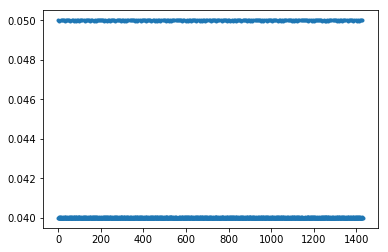

In [40]:
plot(np.diff(x['jdobs'][::8]) * 24.*60*60, '.')

In [33]:
x['jdobs']

array([ 2457846.68284722,  2457846.68284722,  2457846.68284722, ...,
        2457846.68354144,  2457846.68354144,  2457846.68354144])

In [18]:
print x['freq'].shape

(16384,)


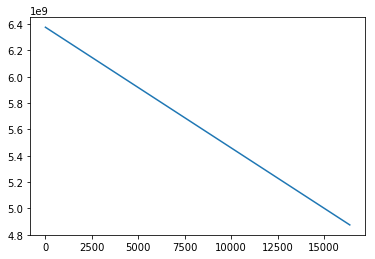

In [19]:
plot(x['freq'])

In [21]:
print x['restfreq'] * 1.e-9

5.625


In [10]:
x['xsky'].shape

(11448,)

In [11]:
x['data'].shape

(11448, 16384)

In [12]:
print 11448/8.

1431.0


In [13]:
1431. * 0.04

57.24

In [8]:
xsky = x['xsky'][::8]
ysky = x['ysky'][::8]

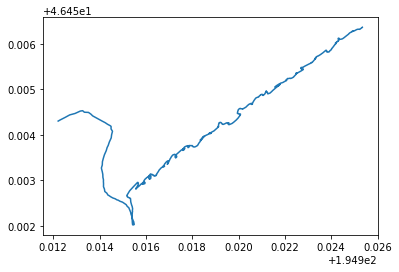

In [9]:
plot(xsky, ysky)

In [47]:
data = x['data']

In [48]:
print data.shape

(11448, 16384)


In [49]:
data = data.reshape((-1, 8, 16384))

In [50]:
data.shape

(1431, 8, 16384)

In [51]:
ondata = data[:,1::2,:]

In [52]:
offdata = data[:,0::2,:]

In [53]:
ondata.shape

(1431, 4, 16384)

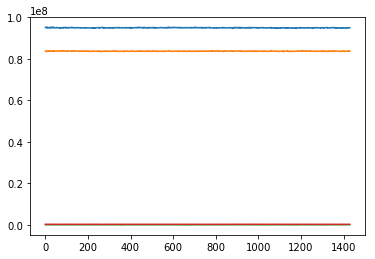

In [54]:
plot(ondata.mean(2))

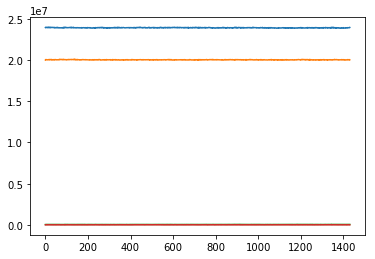

In [56]:
plot(offdata.mean(2))

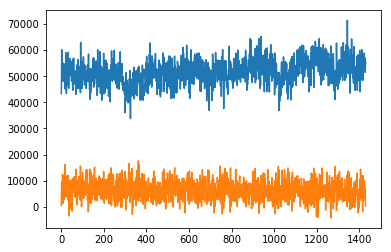

In [57]:
plot(offdata.mean(2)[:,2:])

In [58]:
np.mean(offdata.mean(2)[:,2])

51511.523

In [59]:
np.mean(offdata.mean(2)[:,3])

6392.9106

In [60]:
np.std(offdata.mean(2)[:,2])

4723.1719

In [61]:
np.std(offdata.mean(2)[:,3])

3644.5449

In [62]:
offdata.shape

(1431, 4, 16384)

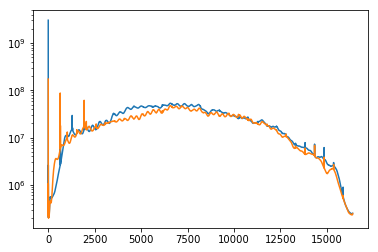

In [103]:
for k in range(2):
    semilogy(offdata[:,k,:].mean(0))

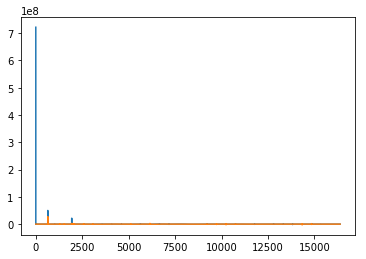

In [104]:
for k in range(2):
    plot(offdata[:,k+2,:].mean(0))

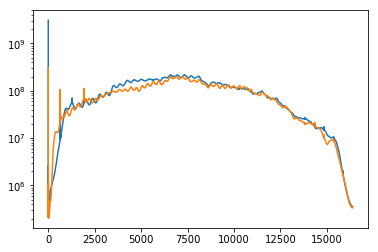

In [102]:
for k in range(2):
    semilogy(np.nanmean(ondata[:,k,:],0))

In [70]:
calibrated_dataX = offdata[:,0,:] / (ondata[:,0,:] - offdata[:,0,:])

/users/mabitbol/miniconda2/envs/gbt/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


In [68]:
np.where(ondata[:,0,:]==offdata[:,0,:])

(array([   6,   23,   25,   31,   50,   62,   63,   80,   88,   93,   93,
         116,  120,  157,  168,  171,  171,  174,  222,  228,  228,  235,
         247,  253,  264,  275,  298,  306,  306,  329,  340,  344,  362,
         367,  376,  429,  467,  473,  480,  481,  494,  509,  518,  528,
         541,  544,  593,  629,  633,  636,  637,  654,  665,  683,  692,
         697,  719,  733,  737,  739,  755,  756,  770,  798,  805,  820,
         828,  848,  852,  858,  858,  868,  874,  893,  906,  920,  923,
         943,  944,  972,  977,  978,  994, 1001, 1012, 1013, 1053, 1067,
        1069, 1081, 1094, 1095, 1095, 1100, 1104, 1104, 1105, 1110, 1114,
        1121, 1129, 1145, 1213, 1215, 1218, 1236, 1239, 1243, 1282, 1314,
        1331, 1348, 1374, 1386, 1390, 1414, 1417]),
 array([ 3, 10, 29, 18, 61,  5, 26, 26,  7, 10, 20, 27, 26,  4, 50, 16, 36,
        13,  8, 34, 45,  1, 33, 14, 36, 15, 39, 51, 64, 26, 20, 18, 50, 20,
        41, 31, 12,  4, 52, 46, 56, 18, 41,  7, 52, 29, 

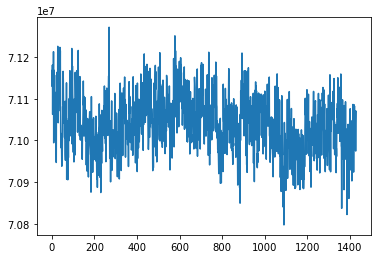

In [66]:
plot(np.mean(ondata[:,0,:] - offdata[:,0,:], 1))

In [72]:
calibrated_dataX.shape

(1431, 16384)

In [ ]:
np.nanmx

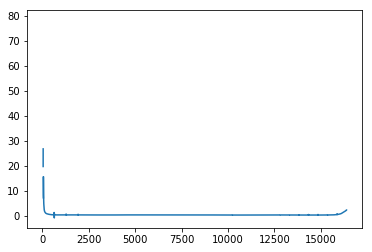

In [73]:
plot(np.nanmean(calibrated_dataX, 0))

/users/mabitbol/miniconda2/envs/gbt/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


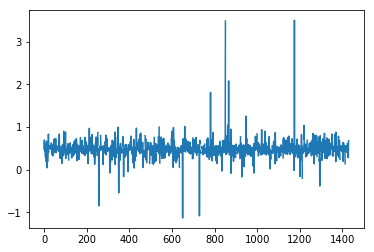

In [74]:
plot(np.nanmean(calibrated_dataX, 1))

In [39]:
testdata = calibrated_dataX.mean(0)[600:800]

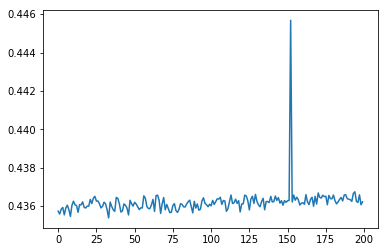

In [40]:
plot(testdata)

In [41]:
rfichannel = np.where(testdata>0.440)[0]

In [43]:
rfichannel += 600

In [44]:
index = np.arange(600, 800)

In [46]:
mask = index!= rfichannel

In [47]:
index = index[mask]

In [48]:
calibrated_dataX.shape

(7153, 1001)

In [49]:
testtod = calibrated_dataX[:,index]

In [50]:
testtod.shape

(7153, 199)

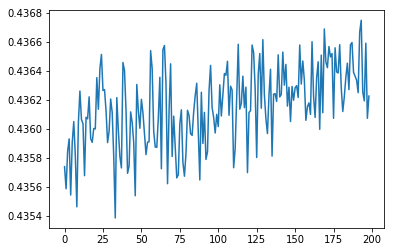

In [51]:
plot(testtod.mean(0))

In [52]:
powertod = testtod.mean(1)

In [53]:
len(powertod)

7153

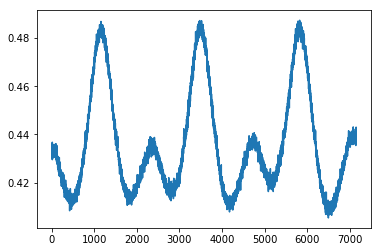

In [54]:
plot(powertod)

In [57]:
ppf = np.fft.fft(powertod)
freqs = np.fft.fftfreq(len(powertod), d=0.04)

In [62]:
len(powertod)

7153

In [71]:
pxx, fr = mlab.psd(offdata[:,0,:].mean(1), NFFT=2**12, Fs=25.)
pxx2, fr = mlab.psd(offdata[:,1,:].mean(1), NFFT=2**12, Fs=25.)

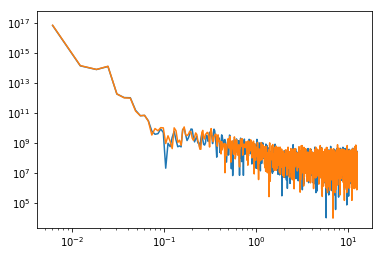

In [75]:
loglog(fr, pxx)
loglog(fr, pxx2)

In [76]:
pxx, fr = mlab.psd(offdata[:,2,:].mean(1), NFFT=2**12, Fs=25.)
pxx2, fr = mlab.psd(offdata[:,3,:].mean(1), NFFT=2**12, Fs=25.)

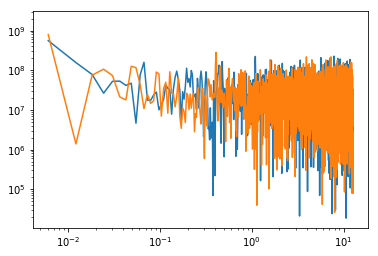

In [77]:
loglog(fr, pxx)
loglog(fr, pxx2)

In [68]:
pxx, fr = mlab.psd(ondata[:,0,:].mean(1), NFFT=2**12, Fs=25.)

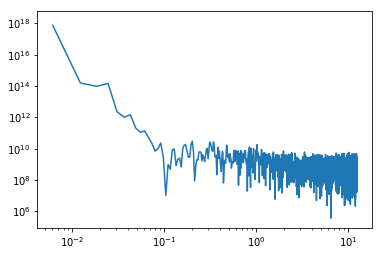

In [69]:
loglog(fr, pxx)